In [102]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn import preprocessing

In [103]:
# Loading data
data = pd.read_csv('data/monks-1.train',header=None,sep=" ")
ts = pd.read_csv('data/monks-1.test',header=None,sep=" ")


data.drop(0,axis=1,inplace=True)
data.drop(8,axis=1,inplace=True)

# Create feature and target arrays
x = data.iloc[:, 1:]
y = data.iloc[:,0]

ts.drop(0,axis=1,inplace=True)
ts.drop(8,axis=1,inplace=True)

# Create feature and target arrays
xts = ts.iloc[:, 1:]
yts = ts.iloc[:,0]


In [104]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10,15],
    'min_samples_leaf': [5,10],
    'n_estimators': [10,15],
    'criterion' : ["gini"],
    'bootstrap' : ["True"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 30,
                           n_jobs=-1, verbose=4, scoring="accuracy", return_train_score=True)
h = grid_search.fit(x, y)


Fitting 30 folds for each of 8 candidates, totalling 240 fits
[CV 12/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=50;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 13/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=50;, score=(train=0.910, test=1.000) total time=   0.1s
[CV 14/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=50;, score=(train=0.902, test=1.000) total time=   0.1s
[CV 15/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=50;, score=(train=0.910, test=1.000) total time=   0.1s
[CV 16/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=50;, score=(train=0.902, test=1.000) total time=   0.1s
[CV 29/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=100;, score=(train=0.885, test=0.500) total time=   0.2s
[CV 30/60] EN

[CV 14/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.893, test=1.000) total time=   0.0s
[CV 15/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.910, test=1.000) total time=   0.0s
[CV 16/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.893, test=1.000) total time=   0.0s
[CV 17/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.918, test=1.000) total time=   0.0s
[CV 18/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.910, test=0.500) total time=   0.0s
[CV 19/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples_leaf=5, n_estimators=15;, score=(train=0.934, test=1.000) total time=   0.0s
[CV 20/60] END bootstrap=False, criterion=entropy, max_depth=50, min_samples

In [105]:
print('Best Score: %.3f' % grid_search.best_score_)


Best Score: 0.827


In [106]:
grid_search.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'n_estimators': 10}

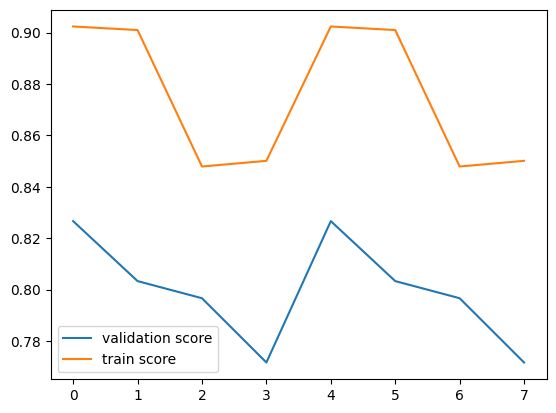

In [107]:
validation_scores = h.cv_results_['mean_test_score']
train_scores = h.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

In [108]:
y_pred = grid_search.predict(xts)
import warnings
warnings.filterwarnings('ignore')  

print("Accuracy score:", accuracy_score(yts, y_pred))

Accuracy score: 0.9050925925925926


In [109]:
print(classification_report(yts, y_pred))
print(confusion_matrix(yts, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       216
           1       0.92      0.89      0.90       216

    accuracy                           0.91       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.91      0.91      0.91       432

[[199  17]
 [ 24 192]]
